Sine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/GLOPS: Code/Dataset/data_sine_burst_only.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2563 - val_loss: 0.1172
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1352 - val_loss: 0.0413
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0417 - val_loss: 0.0222
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 0.0110
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_l

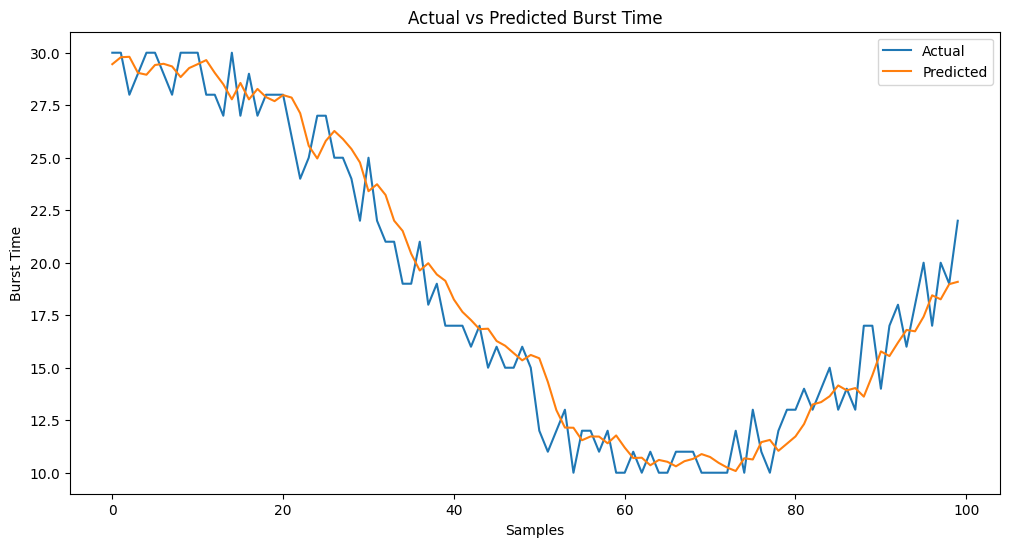

In [ ]:

burst_time = data['BurstTime'].values
scaler = MinMaxScaler()
burst_time_scaled = scaler.fit_transform(burst_time.reshape(-1, 1))

sequence_length = 4
X, y = [], []
for i in range(sequence_length, len(burst_time_scaled)):
    X.append(burst_time_scaled[i-sequence_length:i, 0])
    y.append(burst_time_scaled[i, 0])
X, y = np.array(X), np.array(y)

X_warmup, y_warmup = X[:500], y[:500]

train_size = int(0.8 * len(X_warmup))
X_train, X_test = X_warmup[:train_size], X_warmup[train_size:]
y_train, y_test = y_warmup[:train_size], y_warmup[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Burst Time')
plt.xlabel('Samples')
plt.ylabel('Burst Time')
plt.legend()
plt.show()


Kaggle


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/GLOPS: Code/Dataset/data_kaggle_burst_only.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3245 - val_loss: 0.2676
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2253 - val_loss: 0.1865
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1669 - val_loss: 0.1142
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0992 - val_loss: 0.0888
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0907 - val_loss: 0.0890
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0928 - val_loss: 0.0890
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0917 - val_loss: 0.0898
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0867 - val_loss: 0.0881
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0889 - val_loss: 0.0881
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0870 - val_loss: 0.0881
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0868 - val_loss: 0.0886
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0943 

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
R²: -0.011512111076303455
MSE: 13406.05108325428
MAE: 103.64575332641601


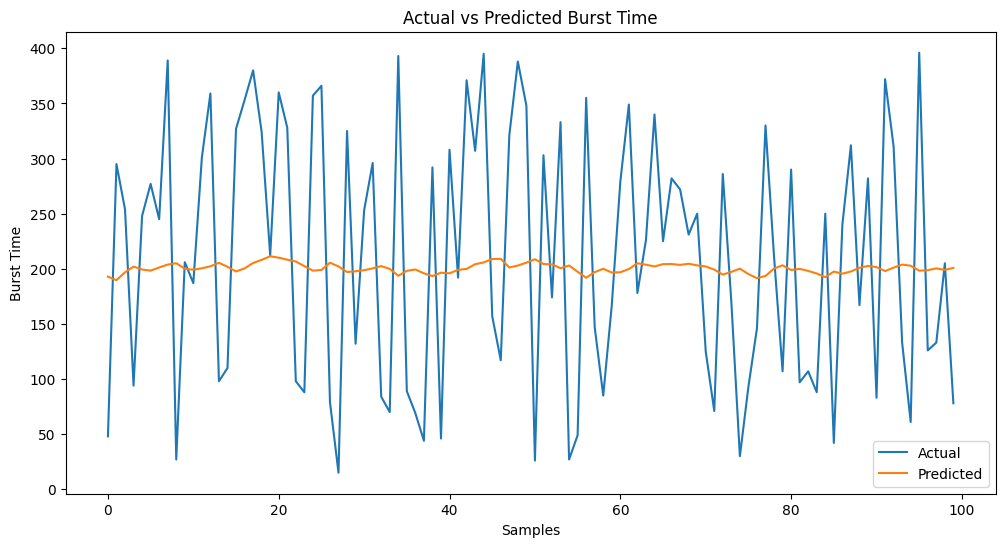

In [ ]:
burst_time = data['BurstTime'].values
scaler = MinMaxScaler()
burst_time_scaled = scaler.fit_transform(burst_time.reshape(-1, 1))


sequence_length = 4
X, y = [], []
for i in range(sequence_length, len(burst_time_scaled)):
    X.append(burst_time_scaled[i-sequence_length:i, 0])
    y.append(burst_time_scaled[i, 0])
X, y = np.array(X), np.array(y)

X_warmup, y_warmup = X[:500], y[:500]

train_size = int(0.8 * len(X_warmup))
X_train, X_test = X_warmup[:train_size], X_warmup[train_size:]
y_train, y_test = y_warmup[:train_size], y_warmup[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Burst Time')
plt.xlabel('Samples')
plt.ylabel('Burst Time')
plt.legend()
plt.show()


No normalization

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 57713.3242 - val_loss: 40226.2930
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24457.9199 - val_loss: 13365.2998
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15101.1152 - val_loss: 12510.9971
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13884.8535 - val_loss: 12949.6436
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12769.2363 - val_loss: 10795.8242
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13042.1309 - val_loss: 11063.0479
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13274.8916 - val_loss: 11654.2549
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12044.1133 - val_loss: 11241.1279
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12363.0547 - val_loss: 12360.7930
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12590.1523 - val_loss: 11098.3047
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12602.2598 - val_lo

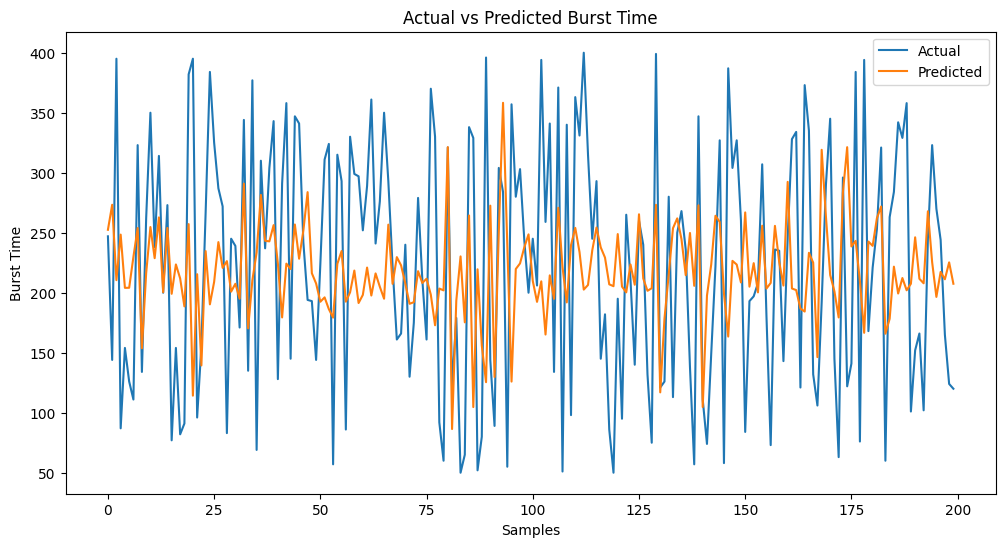

In [ ]:

burst_time = data['BurstTime'].values

sequence_length = 4
X, y = [], []
for i in range(sequence_length, len(burst_time)):
    X.append(burst_time[i-sequence_length:i])
    y.append(burst_time[i])
X, y = np.array(X), np.array(y)

X_warmup, y_warmup = X[:1000], y[:1000]

train_size = int(0.8 * len(X_warmup))
X_train, X_test = X_warmup[:train_size], X_warmup[train_size:]
y_train, y_test = y_warmup[:train_size], y_warmup[train_size:]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),  # First LSTM layer with return_sequences=True
    LSTM(30, activation='relu', return_sequences=True),  # Second LSTM layer
    LSTM(20, activation='relu'),  # Third LSTM layer
    Dense(10, activation='relu'),  # Fully connected layer with 10 neurons
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Burst Time')
plt.xlabel('Samples')
plt.ylabel('Burst Time')
plt.legend()
plt.show()